# Actividad 4: Series de Fourier

2. Use el método de separación de variables para resolver el problema:
$$\frac{\partial u(x,t)}{\partial t} = \frac{\partial^2 u(x,t)}{\partial x^2}, \;\;\;0<x<1,\;t>0$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=f(x),\;\;\;0<x<1,$$
con la función $f(x)$ indicada a continuación:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) $f(x)=sen(2\pi x)-3sen(6\pi x)$
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) $f(x)=-2$
 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c) $f(x)=2x+1$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d)
$$
f(x) = \begin{cases}
    x, & 0 < x \leq 1/2 \\
    0, & 1/2 < x < 1
\end{cases}
$$

De manera general, resolvemos por el método de separación de variable. Para ello suponemos que la solución es de la forma $$u(x,t)=X(x)T(t).$$
Sustituyendo en la ecuación diferencial parcial, obtenemos la igualdad: $$X(x)T'(t)=X''(x)T(t).$$
Las funciones $X$ y $Y$ no pueden ser cero, pues esto evitaría que se cumpliése la condición inicial. Por lo tanto, podemos dividir la anterior igualdad por $X(x)T(t)$: $$\frac{T'(t)}{T(t)}=\frac{X''(x)}{X(x)}.$$
Notamos que para que esta igualdad se mantenga, para todos los valores de $x$ y $t$, se requiere que los cocientes sean iguales a una constante, sea esta $-\lambda$: $$\frac{T'(t)}{T(t)}=\frac{X''(x)}{X(x)}=-\lambda.$$
Obtenemos a partir de la anterior igualdad las siguientes ecuaciones diferenciales: $$X''(x)+\lambda X(x)=0,\;\;\;0<x<L$$
$$T'(t)+\lambda T(t)=0,\;\;\;t>0$$
De la primera condición de frontera, se obtiene que, para $t>0$, $$u(0,t)=X(0)T(t)=0.$$
Como $T\neq0$, se sigue que $$X(0)=0.$$ De manera análoga con la segunda condición de frontera, se obtiene que $$X(L)=0.$$
Se tiene entonces un problema de Sturm-Liouville, a partir de:
$$X''(x)+\lambda X(x)=0,\;\;\;0<x<L,$$
$$X(0)=0,$$
$$X(L)=0,$$
y cuyas soluciones no cero, son las funciones propias $X_n$ correspondientes a los valores propios $\lambda_n$: $$\lambda_n=(\frac{n\pi}{L})^2,\;\;\;X_n(x)=sin(\frac{n\pi x}{L}),\;\;\;n=1,2,...$$
Así mismo, para cada $\lambda_n$, se obtiene la función correspondiente a la componente del tiempo: $$T_n(t)=e^{-k(n\pi/L)^2t},\;\;\;n=1,2,...$$

Así, combinando las funciones $X_n$ y $T_n$ obtenemos las funciones
$$u_n(x,t)=X_n(x)T_n(x)=sin(\frac{n\pi x}{L})e^{-k(n\pi/L)^2t},\;\;\;n=1,2,...,$$
las cuales satisfacen la ecuación diferencial parcial y las condiciones de frontera; y también,
por el principio de superposición, toda combinación lineal finita de estas:
$$\sum_{n=1}^{N} b_n u_n(x,t)=\sum_{n=1}^{N} b_n sin(\frac{n\pi x}{L})e^{-k(n\pi/L)^2t},$$
donde $b_n$ arbitrarios. La condición inicial se cumple por una expresión tal que
$$f(x)=\sum_{n=1}^{N} b_n sin(\frac{n\pi x}{L}).$$
Sin embargo, como todas las funciones $f(x)$ de los incisos son suaves por partes, pueden ser expresadas mediante series de Fourier en la forma:
$$f(x)=\sum_{n=1}^{\infty} b_n sin(\frac{n\pi x}{L})\;\;\;0<x<L,$$
donde
$$b_n=\frac{2}{L}\int_{0}^{L} f(x)sin(\frac{n\pi x}{L}) \,dx\,\;\;\;n=1,2,...$$
Así, la solución al problema está dado por la serie infinita:
$$u(x,t)=\sum_{n=1}^{\infty}b_n sin(\frac{n\pi x}{L})e^{-k(n\pi/L)^2t}.$$

In [5]:
from pylab import *
import numpy as np

#### a) $f(x)=sen(2\pi x)-3sen(6\pi x)$

Para empezar, graficamos la condición inicial.

In [8]:
def fa(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = np.sin(2*np.pi*x[i])-3*np.sin(6*np.pi*x[i])
    return y

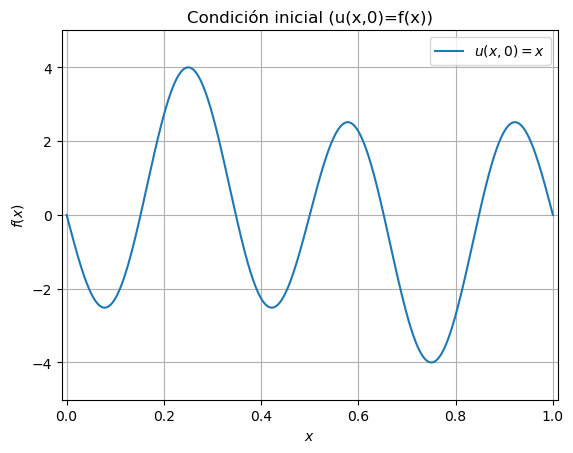

In [9]:
x = linspace(0,1,1000)
f = fa(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-5.01,5.01]),grid(),legend()
show()

Notemos que la condición inicial ya se encuentra expresada de manera finita: $u(x,0)=f(x)=sen(2\pi x)-3sen(6\pi x)$.

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [12]:
def u_x_t(x,t):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        f[:,i] += np.sin(2*np.pi*x)*exp(-2**2*pi**2*t[i])-3*np.sin(6*np.pi*x)*exp(-6**2*pi**2*t[i])
    return f

In [13]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

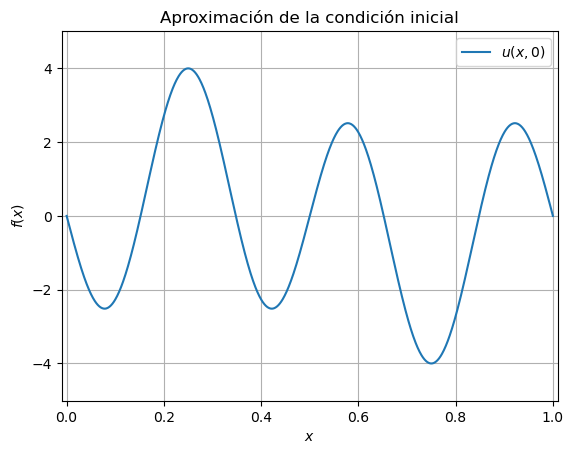

In [14]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-5.01,5.01]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

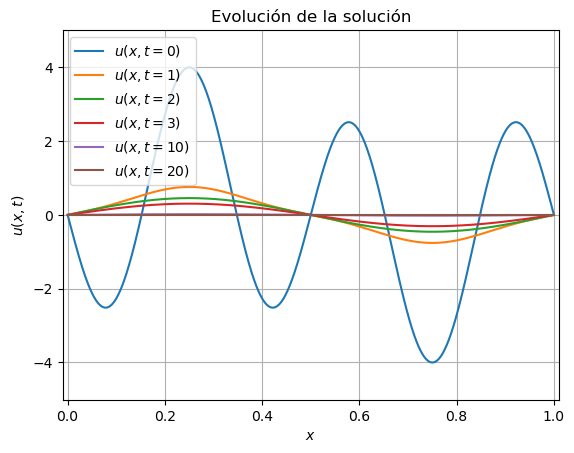

In [16]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-5.01,5.01]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

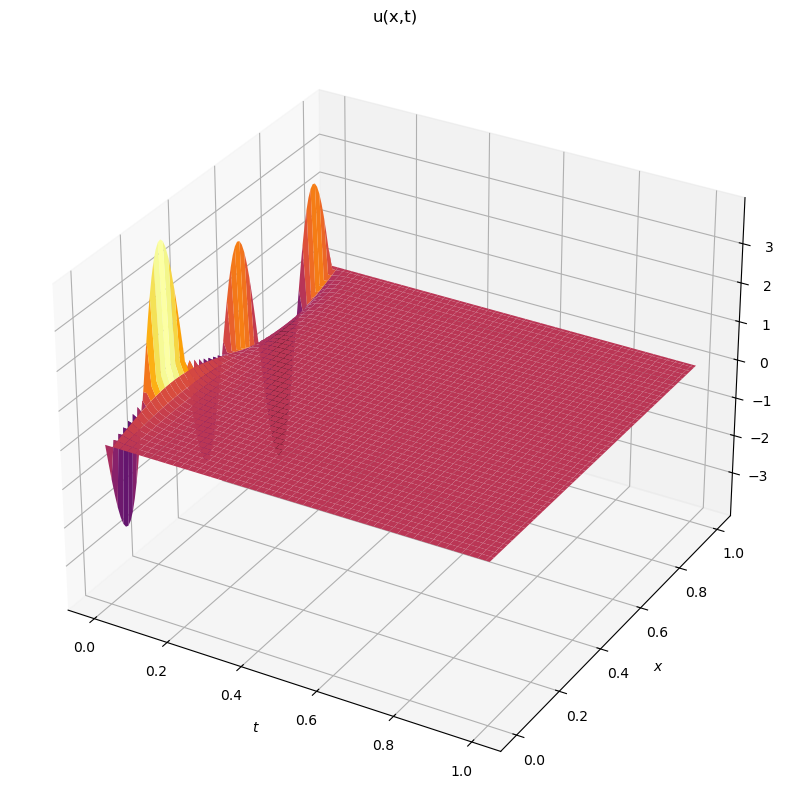

In [18]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"

#### b) $f(x)=-2$

Para empezar, graficamos la condición inicial.

In [21]:
def fb(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = -2
    return y

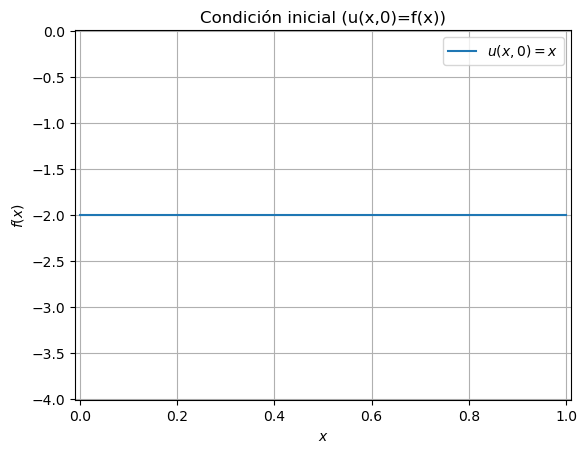

In [22]:
x = linspace(0,1,1000)
f = fb(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-4.01,0.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=-2$.
Calculando las $b_n$ obtenemos: $$b_n=\frac{4[(-1)^n-1]}{\pi n}.$$

In [24]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 4*((-1)**n-1)*sin(n*pi*x)/(pi*n)
    return f

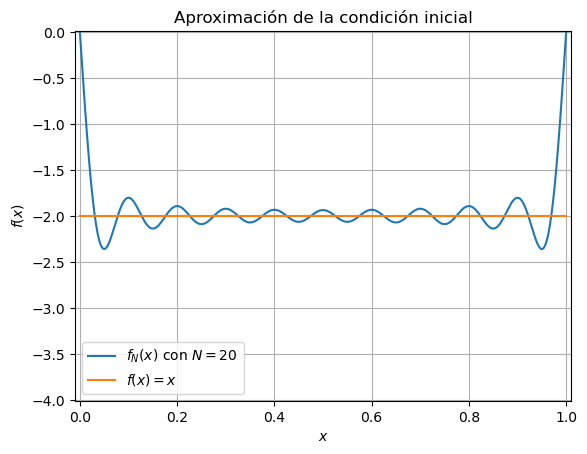

In [25]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-4.01,0.01]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

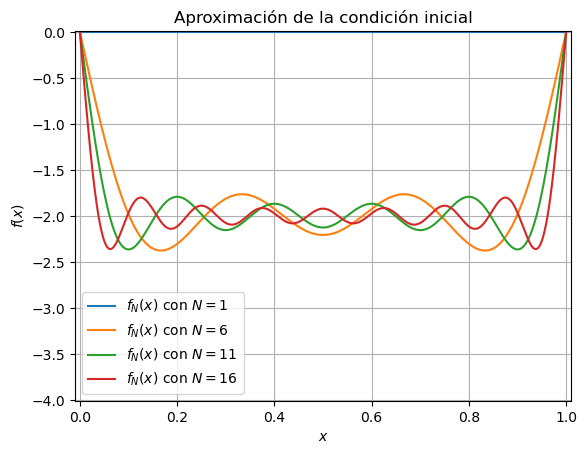

In [27]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-4.01,0.01]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [29]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += 4*((-1)**n-1)*sin(n*pi*x)/(pi*n)*exp(-n**2*pi**2*t[i])
    return f

In [30]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

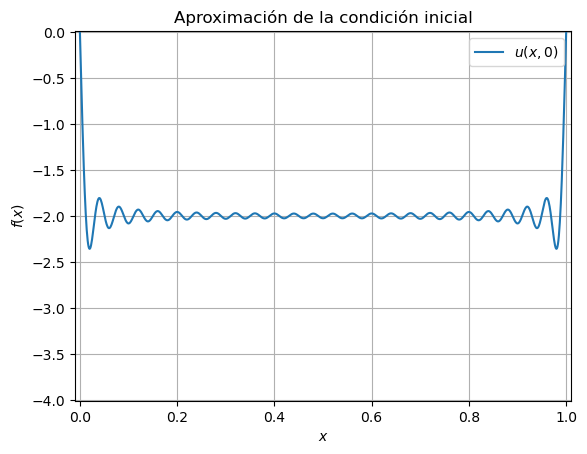

In [31]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-4.01,0.01]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

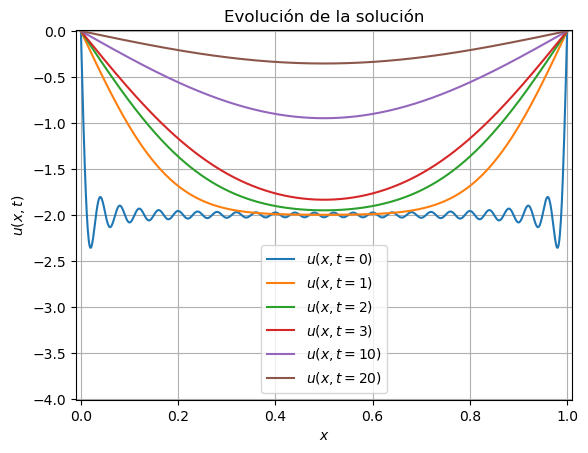

In [33]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-4.01,0.01]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

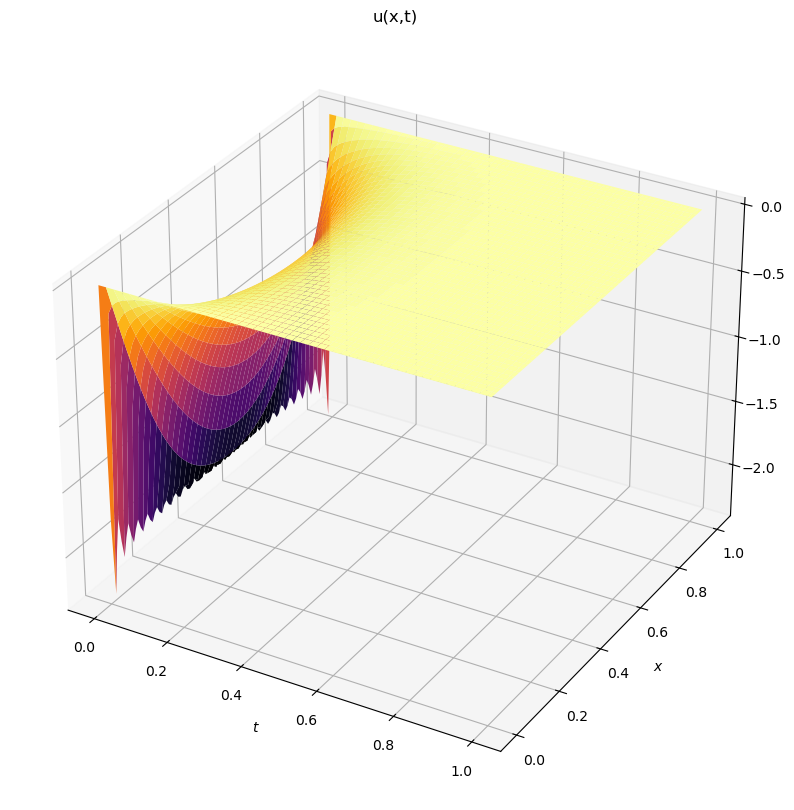

In [35]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"

#### c) $f(x)=2x+1$

Para empezar, graficamos la condición inicial.

In [38]:
def fc(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 2*x[i]+1
    return y

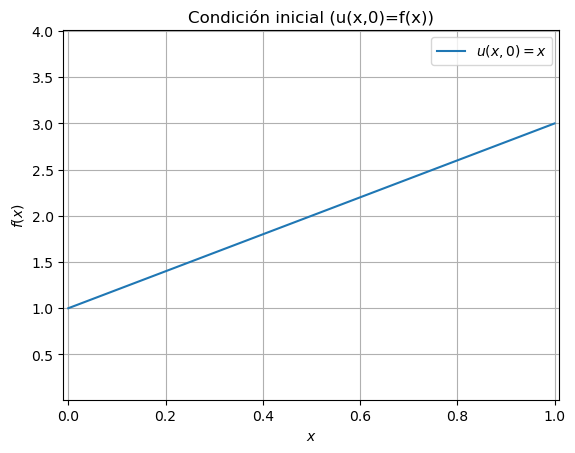

In [39]:
x = linspace(0,1,1000)
f = fc(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([0.01,4.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=2x+1$. Calculando las $b_n$ obtenemos: $$b_n=\frac{2[1-3(-1)^n]}{\pi n}.$$

In [41]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 2*(1-3*(-1)**n)*sin(n*pi*x)/(n*pi)
    return f

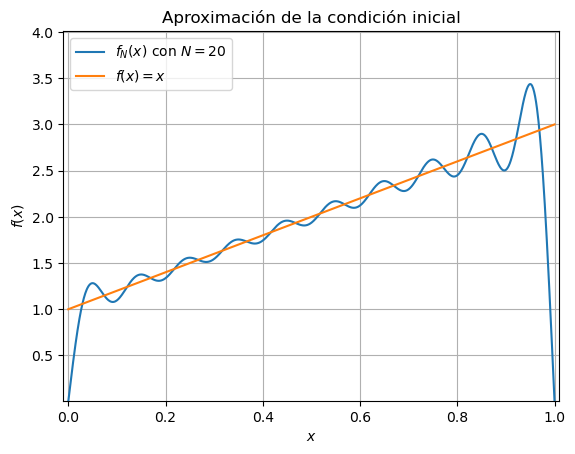

In [42]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([0.01,4.01]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

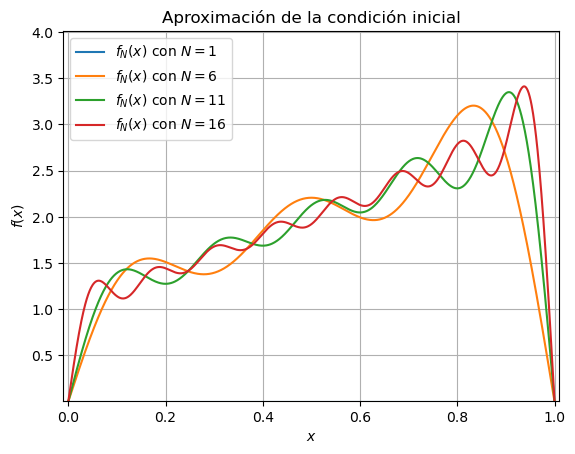

In [44]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([0.01,4.01]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [46]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += 2*(1-3*(-1)**n)*sin(n*pi*x)/(n*pi)*exp(-n**2*pi**2*t[i])
    return f

In [47]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

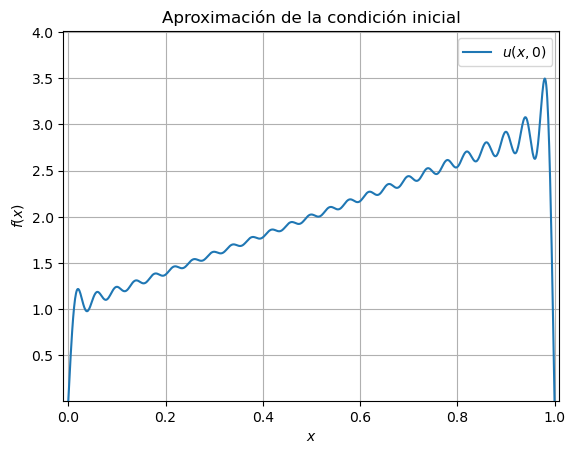

In [48]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([0.01,4.01]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

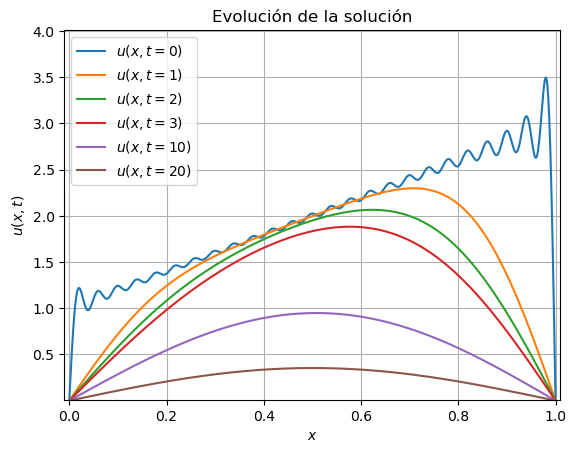

In [50]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([0.01,4.01]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

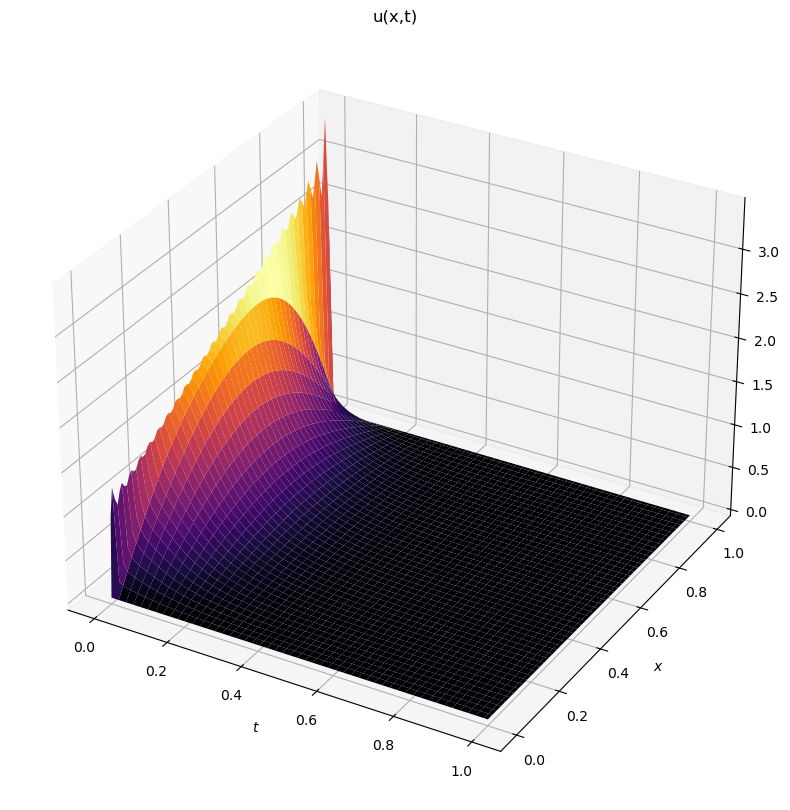

In [52]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"

#### d) $$ f(x) = \begin{cases} x, & 0 < x \leq 1/2 \\ 0, & 1/2 < x < 1 \end{cases} $$

Para empezar, graficamos la condición inicial.

In [55]:
def fd(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]*(1-(x[i]>1/2))
    return y

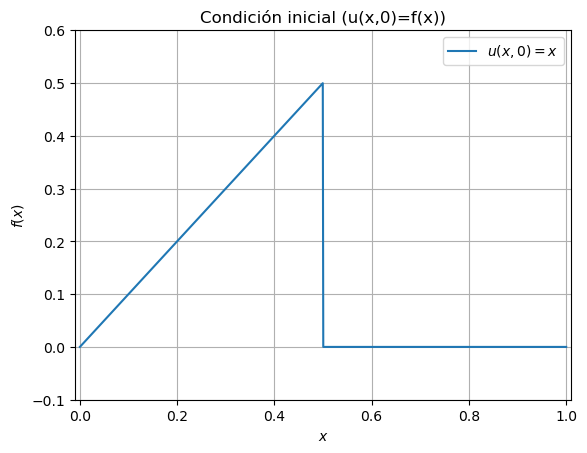

In [56]:
x = linspace(0,1,1000)
f = fd(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.1,0.6]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $$u(x,0)=f(x) = \begin{cases} x, & 0 < x \leq 1/2 \\ 0, & 1/2 < x < 1 \end{cases}. $$
Calculando las $b_n$ obtenemos: $$b_n=\frac{2sen(\frac{\pi n}{2})-\pi ncos(\frac{\pi n}{2})}{2\pi^2 n^2}.$$

In [58]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (2*np.sin(pi*n/2)-pi*n*np.cos(pi*n/2))*np.sin(n*pi*x)/(n*pi)**2
    return f

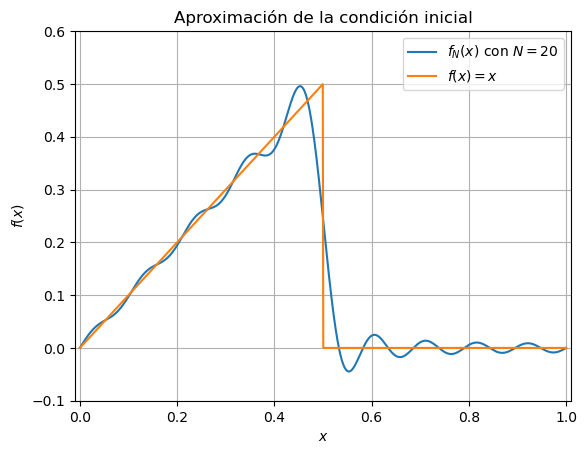

In [59]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.1,0.6]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

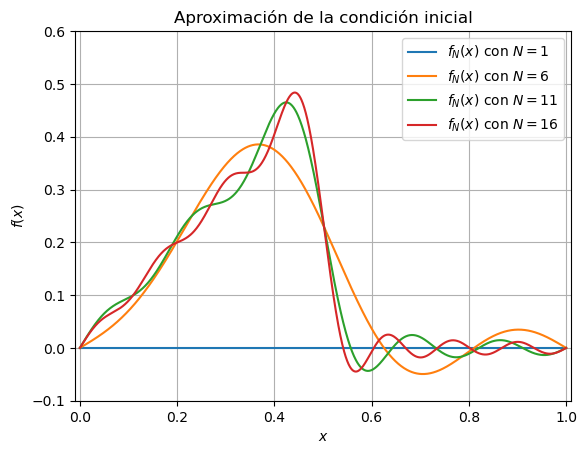

In [61]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.1,0.6]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [63]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (2*np.sin(pi*n/2)-pi*n*np.cos(pi*n/2))*np.sin(n*pi*x)/(n*pi)**2*exp(-n**2*pi**2*t[i])
    return f

In [64]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

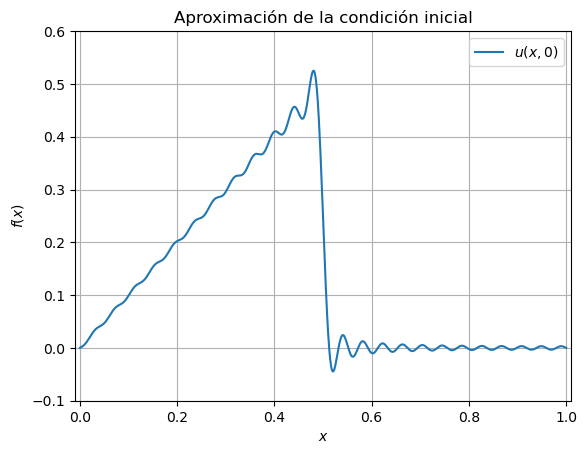

In [65]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.1,0.6]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

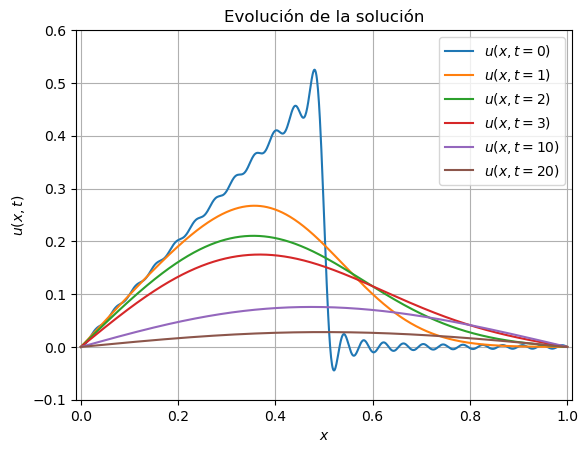

In [67]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.1,0.6]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

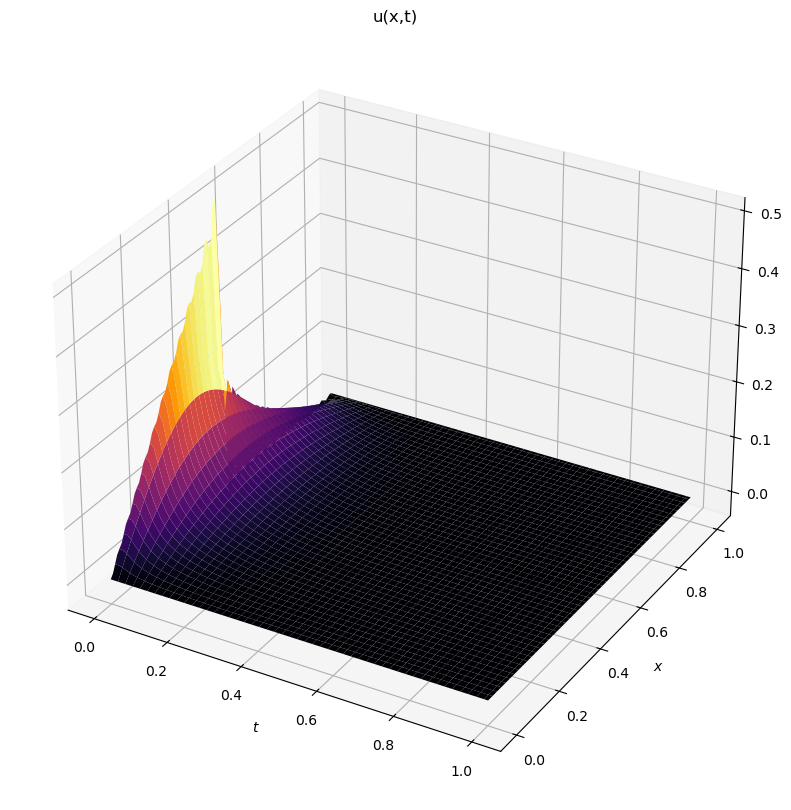

In [69]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"